In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/vatsalsmacbook/anaconda/envs/NewFrontier/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('../src/NSE-APTECHT.csv')
data = data.drop(columns=['Last','Turnover (Lacs)'])
# Invert Data
data = data.iloc[::-1,:].reindex(index=data.index[::-1])
data.fillna('Hold')

,Unnamed: 0,Date,Open,High,Low,Close,Total Trade Quantity,TWAP,Average,Target
986,0,2018-03-16,311.55,313.50,306.05,307.40,407883.0,309.6250,309.549552,Hold
985,1,2018-03-15,310.00,317.70,309.00,311.55,610713.0,312.0625,313.939608,Hold
984,2,2018-03-14,308.00,314.90,306.20,311.60,498026.0,310.1750,311.130343,Hold
983,3,2018-03-13,292.10,316.00,292.10,308.90,1134535.0,302.2750,306.521174,Hold
982,4,2018-03-12,294.45,297.00,288.50,292.85,324692.0,293.2000,292.711246,Hold
981,5,2018-03-09,294.10,300.80,288.00,291.35,477049.0,293.5625,293.915300,Buy
980,6,2018-03-08,300.00,301.85,283.30,291.60,609964.0,294.1875,292.991062,Buy
979,7,2018-03-07,305.90,311.00,292.00,295.70,546553.0,301.1500,302.907495,Sell
978,8,2018-03-06,310.95,317.95,302.10,305.25,408640.0,309.0625,310.571652,Sell
977,9,2018-03-05,314.70,318.50,307.15,308.60,335543.0,312.2375,312.073266,Sell


In [4]:
data = pd.get_dummies(data, columns=['Target'])
data = data.iloc[:,-4:]
data.head()

,Average,Target_Buy,Target_Hold,Target_Sell
986,309.549552,0,1,0
985,313.939608,0,1,0
984,311.130343,0,1,0
983,306.521174,0,1,0
982,292.711246,0,0,0


In [5]:
scl = MinMaxScaler()
cl = data.Average.reshape(data.Average.shape[0],1)
data.Average = scl.fit_transform(cl)
print(cl)

[[ 0.77029813]
 [ 0.78343945]
 [ 0.77503011]
 [ 0.7612329 ]
 [ 0.71989388]
 [ 0.72349812]
 [ 0.72073148]
 [ 0.75041561]
 [ 0.77335771]
 [ 0.77785269]
 [ 0.80047435]
 [ 0.80381288]
 [ 0.80619445]
 [ 0.82034033]
 [ 0.81806846]
 [ 0.81652737]
 [ 0.80271106]
 [ 0.81612898]
 [ 0.73768271]
 [ 0.7759254 ]
 [ 0.82331967]
 [ 0.8691242 ]
 [ 0.77377038]
 [ 0.6488734 ]
 [ 0.64978258]
 [ 0.63304972]
 [ 0.60645652]
 [ 0.65270675]
 [ 0.66456065]
 [ 0.73871496]
 [ 0.77369107]
 [ 0.81672962]
 [ 0.86365144]
 [ 0.89106565]
 [ 0.91405833]
 [ 0.91987408]
 [ 0.89904101]
 [ 0.88069969]
 [ 0.92601864]
 [ 0.93705939]
 [ 0.97277432]
 [ 0.95941608]
 [ 0.97346445]
 [ 0.96458144]
 [ 0.94664472]
 [ 0.96857736]
 [ 0.97453686]
 [ 0.9272194 ]
 [ 0.9195144 ]
 [ 0.92831418]
 [ 0.93106724]
 [ 0.94679894]
 [ 0.94692269]
 [ 0.95603715]
 [ 0.96036641]
 [ 0.96087122]
 [ 0.97351456]
 [ 0.98015441]
 [ 0.98753032]
 [ 0.97934297]
 [ 0.94116126]
 [ 0.94043898]
 [ 0.93940717]
 [ 0.95063626]
 [ 0.94813534]
 [ 0.95238038]
 [ 0.96222

/Users/vatsalsmacbook/anaconda/envs/NewFrontier/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


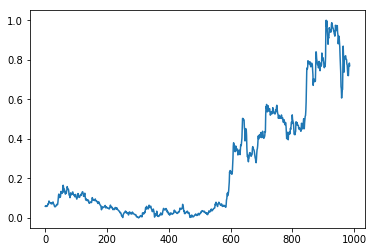

In [6]:
plt.plot(data.Average)

(780, 10) (196, 10) (780, 3) (196, 3)


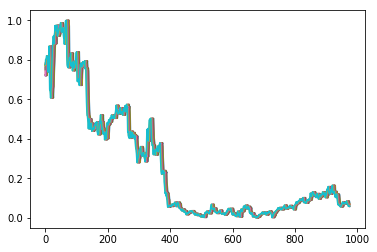

In [7]:
lb = 10

# length of batch = lb
def splitData2(datax,lb):
    data = datax.Average.values
    X, y = [],[]
    for i in range(len(data)-lb-1):
        X.append(datax.iloc[i:i+lb,0].values)
        y.append(datax.iloc[i+lb,1:].values)
    return np.array(X), np.array(y)

X,y = splitData2(data,lb)
# pop = (y[:,0]==1) | (y[:,2]==1)
# pop_val_X, pop_val_y = X[pop], y[pop]

# pop_val_X, pop_val_y = np.tile(pop_val_X,(2,1)), np.tile(pop_val_y,(2,1))


# print(pop_val_X.shape, pop_val_y.shape, X.shape, y.shape)

# X, y = np.vstack((pop_val_X, X)), np.vstack((pop_val_y, y))

plt.plot(X)

X_train, X_test = X[:int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train, y_test = y[:int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8):]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(lb,1)))
model.add(Dropout(0.2))
model.add(Dense(3))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshaping Data for (Sample, Timestep, Features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test), shuffle=False)

Train on 780 samples, validate on 196 samples
Epoch 1/100
780/780 [==============================] - 2s 2ms/step - loss: 4.7317 - acc: 0.4231 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 2/100
780/780 [==============================] - 1s 742us/step - loss: 4.6908 - acc: 0.3936 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 3/100
780/780 [==============================] - 1s 739us/step - loss: 4.5875 - acc: 0.4256 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 4/100
780/780 [==============================] - 1s 740us/step - loss: 4.7114 - acc: 0.4128 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 5/100
780/780 [==============================] - 1s 740us/step - loss: 4.4428 - acc: 0.4026 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 6/100
780/780 [==============================] - 1s 790us/step - loss: 4.9387 - acc: 0.4141 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 7/100
780/780 [==============================] - 1s 1ms/step - loss: 4.6908 - acc: 0.4026 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 8/100
7

780/780 [==============================] - 1s 741us/step - loss: 4.7528 - acc: 0.4000 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 62/100
780/780 [==============================] - 1s 733us/step - loss: 4.6495 - acc: 0.4308 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 63/100
780/780 [==============================] - 1s 736us/step - loss: 4.5668 - acc: 0.4179 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 64/100
780/780 [==============================] - 1s 736us/step - loss: 4.4015 - acc: 0.3974 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 65/100
780/780 [==============================] - 1s 732us/step - loss: 4.6495 - acc: 0.4154 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 66/100
780/780 [==============================] - 1s 736us/step - loss: 4.7941 - acc: 0.4154 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 67/100
780/780 [==============================] - 1s 762us/step - loss: 4.5048 - acc: 0.4167 - val_loss: 3.2894 - val_acc: 0.4133
Epoch 68/100
780/780 [==============================] - 1s 85

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot((history.history['val_acc']))

In [ ]:
X_test[0]

In [ ]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [ ]:
act = []
predicted = []
i=121
Xt = model.predict(X_test[i].reshape(1,7,1))
print("predicted:{0}, actual{1}".format(Xt.round(), y_test[i].reshape(-1,1)))
predicted.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

In [ ]:
model.save('TCS_Open.h5')